In [1]:
import numpy as np
import random
import math
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def underlying(form,a,b,sigma):
    def linear(p):
        var =  random.normalvariate(0,sigma)
        demand = a - b*p + var
        return demand
    def exponential(p):
        var =  random.normalvariate(0,sigma)
        demand = math.exp(a - b*p) + var
        return demand
    def logit(p):
        var =  random.normalvariate(0,sigma)
        demand = math.exp(a - b*p)/(1+math.exp(a - b*p)) + var
        return demand
    if form == 'linear':
        return linear
    elif form == 'exponential':
        return exponential
    elif form == 'logit':
        return logit

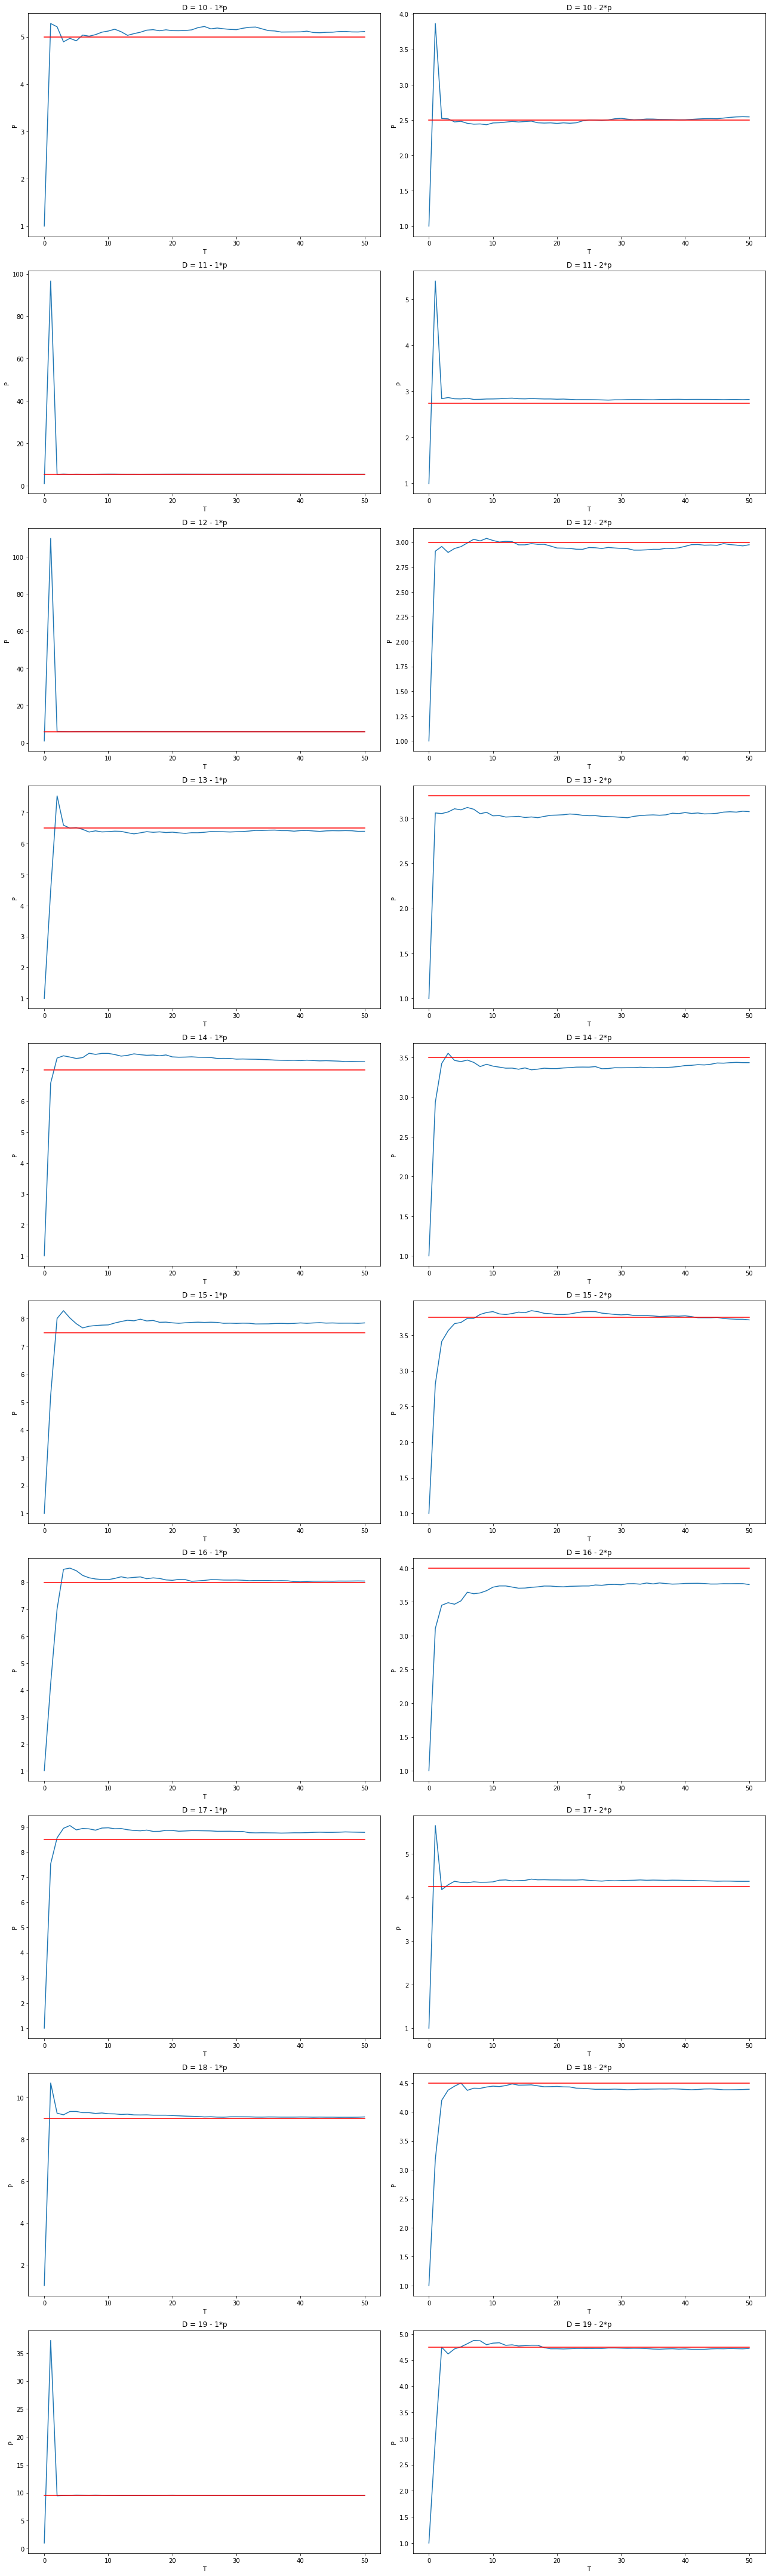

In [66]:
sigma = 0.5
index = 0
plt.figure(figsize = (18, 60))
for a in range(10,20):
    for b in range(1,3):
        index += 1
        title = "D = " + str(a) + ' - ' + str(b) + '*p'
        p_star = a/(2*b)
        func = underlying('linear',a,b,sigma)
        T = 0
        historical_price = []
        historical_demand = []
        T += 1
        p = 1
        d = func(p)
        historical_price.append(p)
        historical_demand.append(d)
        T += 1
        p = p + T**(-0.25)
        d = func(p)
        historical_price.append(p)
        historical_demand.append(d)
        for i in range(50):
            X = sm.add_constant(historical_price)
            model = sm.OLS(historical_demand,X)
            results = model.fit()
            T += 1
            p = -results.params[0]/(2*results.params[1])
            d = func(p)
            historical_price.append(p)
            historical_demand.append(d)
            T += 1
            p = p + T**(-0.25)
            d = func(p)
            historical_price.append(p)
            historical_demand.append(d)
        data = historical_price[::2]
        plt.subplot(10, 2, index)
        plt.plot(data)
        plt.plot([0,50],[p_star,p_star],color = 'r')
        plt.title(title)
        plt.xlabel('T')
        plt.ylabel('P')
plt.tight_layout()
plt.savefig("th1.png")

In [16]:
func = underlying('logit',4.1,1,0.5)
sum_alpha,sum_beta = [0 for i in range(50)],[0 for i in range(50)]
for _ in range(30):
    T = 0
    historical_price = []
    historical_demand = []
    alpha = []
    beta = []
    T += 1
    p = 8
    d = func(p)
    historical_price.append(p)
    historical_demand.append(d)
    T += 1
    p = p + T**(-0.25)
    d = func(p)
    historical_price.append(p)
    historical_demand.append(d)
    for i in range(50):
        X = sm.add_constant(historical_price)
        model = sm.OLS(historical_demand,X)
        results = model.fit()
        T += 1
        alpha.append(results.params[1])
        beta.append(results.params[0])
        p = -results.params[0]/(2*results.params[1])
        if p<= 0:
            p = 1
        d = func(p)
        historical_price.append(p)
        historical_demand.append(d)
        T += 1
        p = p + T**(-0.25)
        d = func(p)
        historical_price.append(p)
        historical_demand.append(d)
    for i in range(50):
        sum_alpha[i] = sum_alpha[i] +alpha[i]
        sum_beta[i] = sum_beta[i] +beta[i]
alpha,beta = [],[]
for i in sum_alpha:
    alpha.append(i/30)
for i in sum_beta:
    beta.append(i/30)

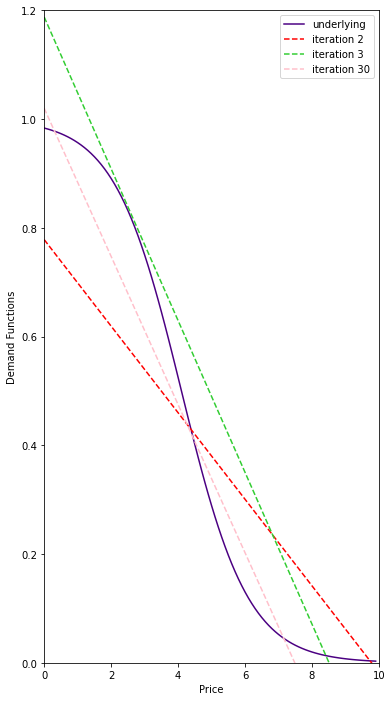

In [17]:
def r_logit(p):
    return np.exp(4.1 - p)/(1+np.exp(4.1 - p)) 
def l2(p):
    return beta[1] + alpha[1]*p
def l3(p):
    return beta[2] + alpha[2]*p
def l30(p):
    return beta[29] + alpha[29]*p
x = np.arange(0,10,0.1)
plt.figure(figsize=(6,12))
plt.plot(x,r_logit(x),color = 'indigo',label='underlying')
plt.plot(x,l2(x),label="iteration 2",color = 'red',linestyle = '--')
plt.plot(x,l3(x),color = 'limegreen',linestyle = '--',label="iteration 3")
plt.plot(x,l30(x),color = 'pink',linestyle = '--',label="iteration 30")
plt.xlabel("Price")
plt.ylabel("Demand Functions")
plt.xlim((0, 10))
plt.ylim((0, 1.2))
plt.legend()
plt.show()

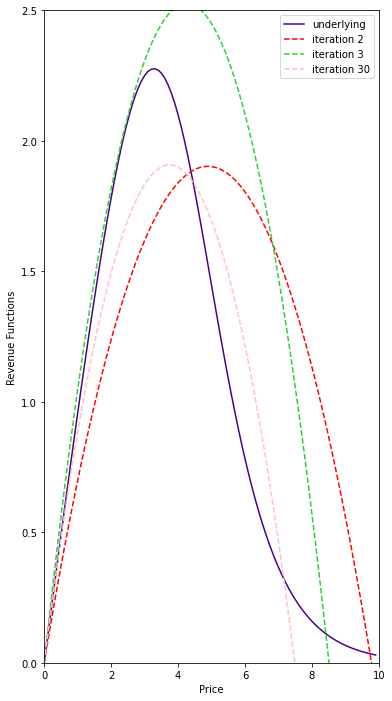

In [18]:
def pr_logit(p):
    return p*(np.exp(4.1 - p)/(1+np.exp(4.1 - p)))
def pl2(p):
    return p*(beta[1] + alpha[1]*p)
def pl3(p):
    return p*(beta[2] + alpha[2]*p)
def pl30(p):
    return p*(beta[29] + alpha[29]*p)
x = np.arange(0,10,0.1)
plt.figure(figsize=(6,12))
plt.plot(x,pr_logit(x),color = 'indigo',label='underlying')
plt.plot(x,pl2(x),label="iteration 2",color = 'red',linestyle = '--')
plt.plot(x,pl3(x),color = 'limegreen',linestyle = '--',label="iteration 3")
plt.plot(x,pl30(x),color = 'pink',linestyle = '--',label="iteration 30")
plt.xlabel("Price")
plt.ylabel("Revenue Functions")
plt.xlim((0, 10))
plt.ylim((0, 2.5))
plt.legend()
plt.show()

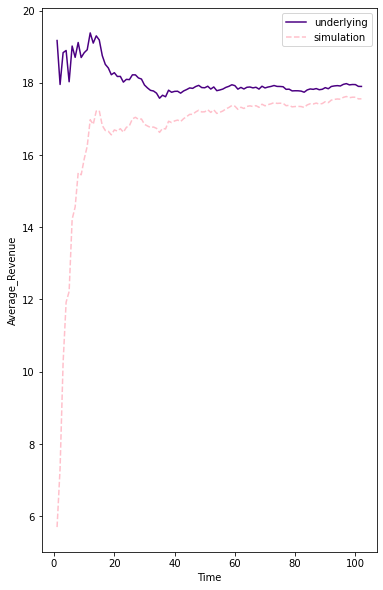

In [42]:
def demand_curve(p):
    demand = a - b*p + var
    return demand

a = 6
b = 0.5
sigma = 0.5
p_star = a/(2*b)

T = 0
historical_price = []
historical_demand = []
historical_revenue = []
star_revenue = []
alpha = []
beta = []
T += 1
var =  random.normalvariate(0,sigma)
p = 1
d = demand_curve(p)
historical_price.append(p)
historical_demand.append(d)
historical_revenue.append(p*d)
star_revenue.append(p_star*demand_curve(p_star))
T += 1
var =  random.normalvariate(0,sigma)
p = p + T**(-0.25)
d = demand_curve(p)
historical_price.append(p)
historical_demand.append(d)
historical_revenue.append((historical_revenue[-1] + p*d))
star_revenue.append(star_revenue[-1] + p_star*demand_curve(p_star))

for i in range(50):
    X = sm.add_constant(historical_price)
    model = sm.OLS(historical_demand,X)
    results = model.fit()
    T += 1
    var =  random.normalvariate(0,sigma)
    alpha.append(results.params[1])
    beta.append(results.params[0])
    p = -results.params[0]/(2*results.params[1])
    d = demand_curve(p)
    historical_price.append(p)
    historical_demand.append(d)
    historical_revenue.append((historical_revenue[-1] + p*d))
    star_revenue.append(star_revenue[-1] + p_star*demand_curve(p_star))
    T += 1
    var =  random.normalvariate(0,sigma)
    p = p + T**(-0.25)
    d = demand_curve(p)
    historical_price.append(p)
    historical_demand.append(d)
    historical_revenue.append((historical_revenue[-1] + p*d))
    star_revenue.append(star_revenue[-1] + p_star*demand_curve(p_star))

for i in range(len(star_revenue)):
    star_revenue[i] = star_revenue[i]/(i+1)
    historical_revenue[i] = historical_revenue[i]/(i+1)
    
plt.figure(figsize=(6,10))
x = [i for i in range(1,1+len(star_revenue))]
plt.plot(x,star_revenue,color = 'indigo',label='underlying')
plt.plot(x,historical_revenue,label="simulation",color = 'pink',linestyle = '--')
plt.xlabel("Time")
plt.ylabel("Average_Revenue")
#plt.xlim((0, 10))
#plt.ylim((0, 1.2))
plt.legend()
plt.show()

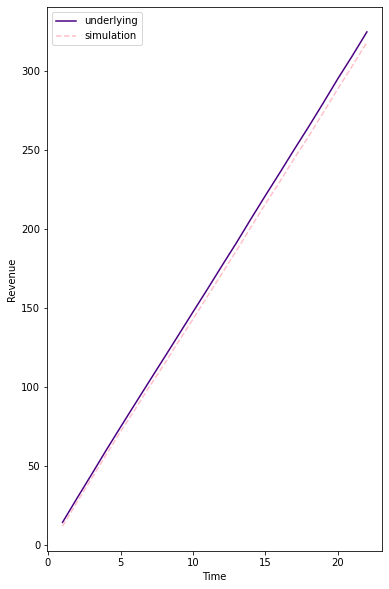

In [32]:
def demand_curve(p):
    demand = math.exp(a - b*p) + var
    return demand

a = 3
b = 0.5
sigma = 0.1
p_star = 1/b

T = 0
historical_price = []
historical_demand = []
historical_revenue = []
star_revenue = []
alpha = []
beta = []
T += 1
var =  random.normalvariate(0,sigma)
p = 1
d = demand_curve(p)
historical_price.append(p)
historical_demand.append(d)
historical_revenue.append(p*d)
star_revenue.append(p_star*demand_curve(p_star))
T += 1
var =  random.normalvariate(0,sigma)
p = p + T**(-0.25)
d = demand_curve(p)
historical_price.append(p)
historical_demand.append(d)
historical_revenue.append(historical_revenue[-1] + p*d)
star_revenue.append(star_revenue[-1] + p_star*demand_curve(p_star))

for i in range(10):
    X = sm.add_constant(historical_price)
    model = sm.OLS(historical_demand,X)
    results = model.fit()
    T += 1
    var =  random.normalvariate(0,sigma)
    alpha.append(results.params[1])
    beta.append(results.params[0])
    p = -results.params[0]/(2*results.params[1])
    d = demand_curve(p)
    historical_price.append(p)
    historical_demand.append(d)
    historical_revenue.append(historical_revenue[-1] + p*d)
    star_revenue.append(star_revenue[-1] + p_star*demand_curve(p_star))
    T += 1
    var =  random.normalvariate(0,sigma)
    p = p + T**(-0.25)
    d = demand_curve(p)
    historical_price.append(p)
    historical_demand.append(d)
    historical_revenue.append(historical_revenue[-1] + p*d)
    star_revenue.append(star_revenue[-1] + p_star*demand_curve(p_star))
    
plt.figure(figsize=(6,10))
x = [i for i in range(1,1+len(star_revenue))]
plt.plot(x,star_revenue,color = 'indigo',label='underlying')
plt.plot(x,historical_revenue,label="simulation",color = 'pink',linestyle = '--')
plt.xlabel("Time")
plt.ylabel("Revenue")
#plt.xlim((0, 10))
#plt.ylim((0, 1.2))
plt.legend()
plt.show()